In [1]:
# encoding: UTF-8
# Copyright Diogenes Ademir Domingos 2017
# Authored by Diogenes Ademir Domingos (k.fus@hotamil.com)
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [4]:
# Configunrando o notebook.

import random
import numpy as np
import matplotlib.pyplot as plt

# Configunrando o framework Keras.

# Importando a base de dados MNIST (http://yann.lecun.com/exdb/mnist/)
from keras.datasets import mnist

# Importando o modelo do Keras (https://keras.io/getting-started/sequential-model-guide/)
from keras.models import Sequential

# Importando o tipo de camada
from keras.layers import Dense

# Importando modulo de Dropout da rede, para aplicar mutações.
from keras.layers import Dropout

# Importando Lib de utilidades (https://keras.io/utils/)
from keras.utils import np_utils

# Importante otimizadores de função keras
import keras.optimizers 

# permitindo mais de um print por saída
from __future__ import print_function

# Configurando o plot para ser inline ao inves de outra janela.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Load dos dados
# Criando uma matriz numpy de dados de treino.
# Criando uma matriz numpy de dados de teste.
# O conjunto de treinamento possui 60.000 exemplos
# O conjunto de testes de 10.000 exemplos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# Amostragem
# Como o conjunto é muito grande para processar na maquina inloco, reduzi criei um subconjunto para experimento.
amostra_treino = 5000
mascara = list(range(amostra_treino))
X_train = X_train[mascara]
y_train = y_train[mascara]

amostra__teste = 500
mask = list(range(amostra__teste))
X_test = X_test[mascara]
y_test = y_test[mascara]

In [7]:
# Visualizando dimensão dos dados.
# (Quantidade, largura, altura)
print('Dados de treino shape: ', X_train.shape)
print('Rotulos de treino shape: ', y_train.shape)
print('Dados de teste shape: ', X_test.shape)
print('Rotulos de teste: ', y_test.shape)

Dados de treino shape:  (5000, 28, 28)
Rotulos de treino shape:  (5000,)
Dados de teste shape:  (5000, 28, 28)
Rotulos de teste:  (5000,)


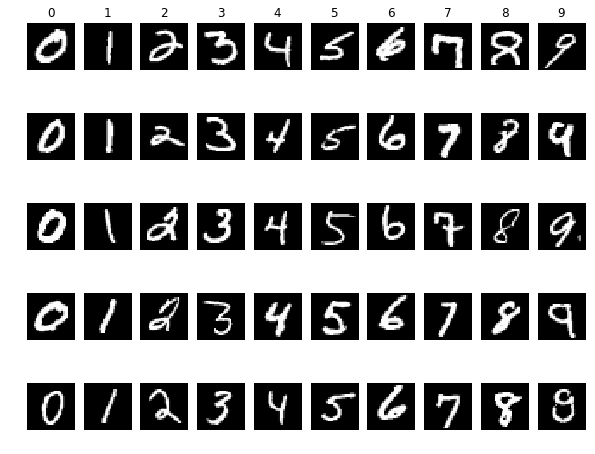

In [8]:
# Visualizando amostra dos dados
# Vetor de classes para indice
classes = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
quantidade_classes = len(classes)
amostras_por_classe = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, amostras_por_classe, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * quantidade_classes + y + 1
        plt.subplot(amostras_por_classe, quantidade_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [9]:
# Definindo a qunatidade de neurõnios por camada da RNA

# quantidade de pixels na camada de entrada de dados
# um neuronio para cada pixel
num_pixels = X_train.shape[1] * X_train.shape[2]
print("Quantidade de neurônios (camada entrada): ",num_pixels)

# quantidade de pixels na segunda camada (escondida)
segunda_camada = int(num_pixels/4) # pixels da segunda camada
print("Quantidade de neurônios (camada escondida 01): ",segunda_camada)

# quantidade de pixels na terceira camada (escondida)
terceira_camada = int(num_pixels/8) # pixels da terceira camada
print("Quantidade de neurônios (camada escondida 02): ",terceira_camada)

# lista de camadas ocultas para usar no modelo
camadas_ocultas = [segunda_camada, terceira_camada]

Quantidade de neurônios (camada entrada):  784
Quantidade de neurônios (camada escondida 01):  196
Quantidade de neurônios (camada escondida 02):  98


In [10]:
# Convertendo as imagens em vetores de pixels
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
print('Dados de treino reshape: ', X_train.shape)
print('Rotulos de treino reshape: ', y_train.shape)

Dados de treino reshape:  (5000, 784)
Rotulos de treino reshape:  (5000,)


In [11]:
# Binarizando pixels
X_train = X_train / 255
X_test = X_test / 255

In [12]:
# criando a classificação
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
# verificando a quantidade de classes encontradas
num_classes = y_test.shape[1]
print('Classes encontradas shape: ',y_test.shape)

Classes encontradas shape:  (5000, 10)


In [24]:
# Criando arquitetura da rede
def base_model(num_pixels, num_classes, camadas_ocultas):
    
	model = Sequential() # tipo keras senquencial (https://keras.io/getting-started/sequential-model-guide/)
    
    # Adicionando uma camada densa (totalmente conectada) para entrada de dados, 
    # quantidade de neuronio = quantidade de pixels
    # inicialização os pesos da rede, modo normal = {'mean': 0.0, 'seed': None, 'stddev': 0.05}
    # Função de ativação do neurônio será Relu (https://en.wikipedia.org/wiki/Rectifier_(neural_networks))
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    
    # O dropout atribui, aleatoriamente à entrada de uma fração unidades, valor 0
    # em cada época de treinamento. Ajuda a evitar a overfitting
    # parâmentro (0 > x < 1) é a taxa % de queda
	model.add(Dropout(0.1))
    
    # Adicionando uma camada densa (totalmente conectada) primeira camada oculta, 
    # inicialização os pesos da rede, modo normal = {'mean': 0.0, 'seed': None, 'stddev': 0.05}
    # Função de ativação do neurônio será Relu (https://en.wikipedia.org/wiki/Rectifier_(neural_networks))
	model.add(Dense(camadas_ocultas[0], input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    
    # Adicionando uma camada densa (totalmente conectada) segunda camada oculta, 
    # inicialização os pesos da rede, modo normal = {'mean': 0.0, 'seed': None, 'stddev': 0.05}
    # Função de ativação do neurônio será Relu (https://en.wikipedia.org/wiki/Rectifier_(neural_networks))
	model.add(Dense(camadas_ocultas[1], input_dim=camadas_ocultas[0], kernel_initializer='normal', activation='relu'))
    
    # Adicionando uma camada densa (totalmente conectada) para saída de dados, 
    # inicialização os pesos da rede, modo normal = {'mean': 0.0, 'seed': None, 'stddev': 0.05}
    # Função de ativação do neurônio será Softmax (https://en.wikipedia.org/wiki/Softmax_function)
    # tipo da camada de saída é predição
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax', name='preds'))
    
    # Função para otimização estocástica, requer apenas gradientes de primeira ordem com pouco requisito de memória.
    # Referência: (KINGMA, Diederik; BA, Jimmy. Adam: A method for stochastic optimization. arXiv preprint arXiv:1412.6980, 2014.)
    # lr: taxa de aprendizado
    # decay: tamanho do passo da caída do gradiente
	adam = keras.optimizers.Adam(lr=0.01, decay=1e-6)
        
    # Copilando o modelo
    # Função de apredizado será cross-entropy (https://en.wikipedia.org/wiki/Cross_entropy)
    # métrica de reconhecimento será precisão.
	model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    # retorna o modelo compilado
	return model

In [25]:
# instanciando o modelo RNA
model = base_model(num_pixels, num_classes, camadas_ocultas)

In [26]:
# Descrevendo a representação do modelo RNA
# Arranjo dimensional: 
# 1 camada de entrada;
# 2 camadas ocultas;
# 1 camada de saída (preds);
# quantidade de parâmentros da rede (pesos).
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_4 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 196)               153860    
_________________________________________________________________
dense_12 (Dense)             (None, 98)                19306     
_________________________________________________________________
preds (Dense)                (None, 10)                990       
Total params: 789,596
Trainable params: 789,596
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Retorna a configuração do modelo RNA
model.get_config()

In [ ]:
# Verificando os pesos da RNA
model.get_weights()

In [28]:
# Treinando o modelo RNA para 01 época
# Função FIT: realiza o treinamento até uma quantidade de épocas determinada.
# parametro validation_data: Dados para avaliar a perda do gradiente ao final de cada época
# parametro batch_size: numero de amostras para atualizar a perda do gradientes
# Paramentro verbose : 0 = silent, 1 = verbose, 2 = one log line per epoch.
# %time = medindo tempo do treino
%time model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=100, verbose=2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/1
1s - loss: 0.8030 - acc: 0.7358 - val_loss: 0.3753 - val_acc: 0.8834
Wall time: 2.67 s


In [29]:
# Avaliando a precisão do modelo RNA
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro de: %.2f%%" % (100-scores[1]*100))
print("Precisão de: %.2f%%" % (scores[1]*100))

Erro de: 11.66%
Precisão de: 88.34%


In [30]:
# Treinando o modelo RNA para 05 épocas
# %time = medindo tempo do treino
%time model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=100, verbose=2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/5
1s - loss: 0.2447 - acc: 0.9296 - val_loss: 0.3377 - val_acc: 0.9020
Epoch 2/5
1s - loss: 0.1736 - acc: 0.9502 - val_loss: 0.4096 - val_acc: 0.8836
Epoch 3/5
1s - loss: 0.1246 - acc: 0.9610 - val_loss: 0.3531 - val_acc: 0.9066
Epoch 4/5
1s - loss: 0.0913 - acc: 0.9726 - val_loss: 0.3953 - val_acc: 0.9038
Epoch 5/5
1s - loss: 0.1195 - acc: 0.9646 - val_loss: 0.3688 - val_acc: 0.9104
Wall time: 7.57 s


In [31]:
# Avaliando a precisão do modelo RNA
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro de: %.2f%%" % (100-scores[1]*100))
print("Precisão de: %.2f%%" % (scores[1]*100))

Erro de: 8.96%
Precisão de: 91.04%


In [32]:
# Treinando o modelo RNA para 100 épocas
# %time = medindo tempo do treino
%time model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=100, verbose=0)

Wall time: 2min 21s


In [33]:
# Avaliando a precisão do modelo RNA
scores = model.evaluate(X_test, y_test, verbose=0)
print("Erro de: %.2f%%" % (100-scores[1]*100))
print("Precisão de: %.2f%%" % (scores[1]*100))

Erro de: 8.26%
Precisão de: 91.74%
